# Model description


### Solow Model with Human Capital
We use the Solow model with Human capital and solve it. Thereafter we try with different parameterestimates and shocks to the model. Lastly we will make an addition where we introduce a tax in the model, and compare it to our first model. The model is given by: 

1. **Production Function:**
   The extended Cobb-Douglas production function including human capital is given by:
   $$
   Y_t = K_t^\alpha H_t^\phi (A_t L_t)^{1-\alpha-\phi}
   $$

2. **Capital Accumulation Equations:**
   - **Physical Capital:**
     $$
     K_{t+1} = s_K Y_t + (1 - \delta) K_t
     $$
   - **Human Capital:**
     $$
     H_{t+1} = s_H Y_t + (1 - \delta) H_t
     $$
   where s_K and s_H are the savings rates for physical and human capital, and delta is the common depreciation rate for both types of capital.

3. **Per Worker Terms:**
   Transforming these equations into per effective worker terms involves normalizing by the effective labor:
   - **Capital per effective worker:**
     $$
     \tilde{k}_{t+1} = \frac{s_K \tilde{y}_t + (1-\delta) \tilde{k}_t}{(1+n)(1+g)}
     $$
   - **Human capital per effective worker:**
     $$
     \tilde{h}_{t+1} = \frac{s_H \tilde{y}_t + (1-\delta) \tilde{h}_t}{(1+n)(1+g)}
     $$
   where n is the growth rate of labor and g is the growth rate of technology.

The we find the steady values by:
$$ \tilde{k}_t = \tilde{k}_{t+1} = \tilde{k}^\star  \\
\tilde{h}_t = \tilde{h}_{t+1} = \tilde{h}^\star 

In [2]:
import sympy as sm

# Definining parameters
sK, sH, alpha, varphi, delta, k_tilde, h_tilde, n, g = sm.symbols('sK sH alpha varphi delta k_tilde h_tilde n g')


eq_k = sm.Eq(k_tilde, (sK * k_tilde**alpha * h_tilde**varphi + (1 - delta) * k_tilde) / ((1 + n) * (1 + g)))


steady_state_k = sm.solve(eq_k, k_tilde)[0]


steady_state_k

((delta + g*n + g + n)/(h_tilde**varphi*sK))**(1/(alpha - 1))

In [3]:
eq_h = sm.Eq(h_tilde, (sH * k_tilde**alpha * h_tilde**varphi + (1 - delta) * h_tilde) / ((1 + n) * (1 + g)))
steady_state_h = sm.solve(eq_h, h_tilde)[0]
steady_state_h

((delta + g*n + g + n)/(k_tilde**alpha*sH))**(1/(varphi - 1))

**Steady State for Capital and Human capital:**

We rewrite the two solutions for k_tilde and h_tilde and get the steady state value.

- **Capital per effective worker:**
  $$
  \tilde{k}^* = \left(\frac{s_K^{1-\phi} s_H^\phi}{n+g+\delta+n\delta}\right)^{\frac{1}{1-\alpha-\phi}}
  $$

- **Human capital per effective worker:**
  $$
  \tilde{h}^* = \left(\frac{s_K^\alpha s_H^{1-\alpha}}{n+g+\delta+n\delta}\right)^{\frac{1}{1-\alpha-\phi}}
  $$

**Steady state for output per effective worker:**

Then the steady state output per effective worker is given by the following equation:

$$
\tilde{y}^* = (\tilde{k}^*)^\alpha (\tilde{h}^*)^\phi
$$

Using the values for capital per effective worker and human capital per effective worker derived previously:

$$
\tilde{y}^* = \left( \left( \frac{s_K^{1-\phi} s_H^\phi}{n+g+\delta+n\delta} \right)^{\frac{\alpha}{1-\alpha-\phi}} \right) \left( \left( \frac{s_K^\alpha s_H^{1-\alpha}}{n+g+\delta+n\delta} \right)^{\frac{\phi}{1-\alpha-\phi}} \right)
$$

Expanding this, we get:

$$
\tilde{y}^* = \left( \frac{s_K}{n+g+\delta+n\delta} \right)^{\frac{\alpha}{1-\alpha-\phi}} \left( \frac{s_H}{n+g+\delta+n\delta} \right)^{\frac{\phi}{1-\alpha-\phi}}
$$

7. **Parameterestimates** 

We are using the estimates used in macro 1 lectures and simulation of the Solow model with Human capital, which is done by Casper Worm:

$$\alpha = 0.33 , \phi = 0.33, s_H = 0.2, s_K = 0.2, delta = 0.05, n = 0.025, g = 0.02

In [4]:
import sympy as sm

# Define the symbols
s_K, s_H, n, g, delta, nd, phi, alpha = sm.symbols('s_K s_H n g delta nd phi alpha')

# Equation for capital per effective worker (k*)
k_star = ((s_K**(1-phi) * s_H**phi) / (n + g + delta + n*delta))**(1 / (1 - alpha - phi))

# Equation for human capital per effective worker (h*)
h_star = ((s_K**alpha * s_H**(1-alpha)) / (n + g + delta + n*delta))**(1 / (1 - alpha - phi))

# Display the equations
k_star, h_star


((s_H**phi*s_K**(1 - phi)/(delta*n + delta + g + n))**(1/(-alpha - phi + 1)),
 (s_H**(1 - alpha)*s_K**alpha/(delta*n + delta + g + n))**(1/(-alpha - phi + 1)))

## Analytical solution

We now have our model and estimates to find the steady state values for our 3 variables. We use our 3 defined equations and find use sympy to find the optimal values.

Steady state, for Human capital, Capital akkumulation and output

In [5]:
ss_func1 = sm.lambdify((s_K,phi,s_H,n,g,delta,alpha),k_star)

ss_func1(0.2,0.33,0.2,0.025,0.02,0.05,0.33)

8.594165217704216

In [6]:
ss_func2 = sm.lambdify((s_K,phi,s_H,n,g,delta,alpha),h_star)

ss_func2(0.2,0.33,0.2,0.025,0.02,0.05,0.33)

8.594165217704216

In [7]:
import scipy.optimize as optimize

# Constants
s_K = 0.2
s_H = 0.2
alpha = 0.33
phi = 0.33
n = 0.025
g = 0.02
delta = 0.05

k_tilde_t = ((s_K**(1-phi) * s_H**phi) / (n + g + delta + n*delta))**(1 / (1 - alpha - phi))
h_tilde_t = ((s_K**alpha * s_H**(1-alpha)) / (n + g + delta + n*delta))**(1 / (1 - alpha - phi))
y_tilde_t = h_tilde_t**phi * k_tilde_t**alpha

obj_k_tilde = lambda k: k - k_tilde_t
obj_h_tilde = lambda h: h-h_tilde_t
obj_y_tilde = lambda y: y-y_tilde_t
# Use root_scalar to find the root of the objective function
result_k = optimize.root_scalar(obj_k_tilde, bracket=[0.1, 100], method='brentq')
result_h = optimize.root_scalar(obj_h_tilde, bracket=[0.1, 100], method='brentq')
result_y = optimize.root_scalar(obj_y_tilde, bracket=[0.1, 100], method='brentq')
print('The steady state for k_tilde is', result_k.root)
print('The steady state for h_tilde is', result_h.root)
print('The steady state for y_tilde is', result_y.root)


The steady state for k_tilde is 8.594165217704218
The steady state for h_tilde is 8.594165217704218
The steady state for y_tilde is 4.135942011020154


Thereby we have our 3 steady state solutions:
$$\tilde{k}^\star = 8.594 \\
\tilde{h}^\star = 8.594 \\
\tilde{y}^\star = 4.136$$

We see that k* and h* is the same value which make sense because:
$$\alpha=\varphi \\
s_H = s_K$$
Therefore we have the same steady state value for both human capital and capital. 

## Numerical solution

We will use a Transitions diagram to see the path human capital takes over time.

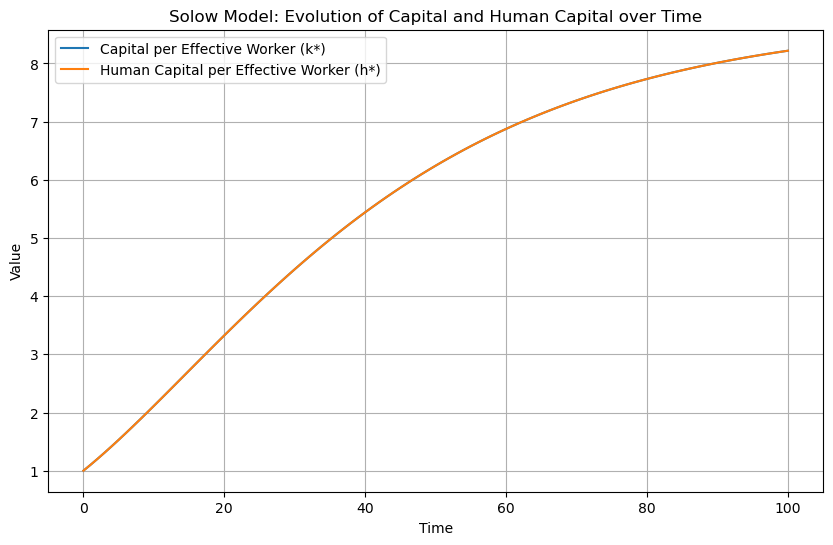

In [8]:
import numpy as np
import matplotlib.pyplot as plt

# Define the Solow model transition equations
def solow_model_dynamics(k, h, s_K, s_H, alpha, phi, n, g, delta):
    k_next = (1 / ((1 + n) * (1 + g))) * (s_K * k**alpha * h**phi + (1 - delta) * k)
    h_next = (1 / ((1 + n) * (1 + g))) * (s_H * k**alpha * h**phi + (1 - delta) * h)
    return k_next, h_next


s_K = 0.2
s_H = 0.2
alpha = 0.33
phi = 0.33
n = 0.025
g = 0.02
delta = 0.05

# Initial conditions
k0 = 1.0  # Initial capital per effective worker
h0 = 1.0  # Initial human capital per effective worker

# Time points for integration (0 to 100 time units)
t = np.arange(0, 101)  

# Simulate the dynamics of capital and human capital over time
k_sol = np.zeros(len(t))
h_sol = np.zeros(len(t))
k_sol[0] = k0
h_sol[0] = h0

for i in range(1, len(t)):
    k_sol[i], h_sol[i] = solow_model_dynamics(k_sol[i-1], h_sol[i-1], s_K, s_H, alpha, phi, n, g, delta)

# Plot the evolution of capital and human capital over time
plt.figure(figsize=(10, 6))
plt.plot(t, k_sol, label='Capital per Effective Worker (k*)')
plt.plot(t, h_sol, label='Human Capital per Effective Worker (h*)')
plt.xlabel('Time')
plt.ylabel('Value')
plt.title('Solow Model: Evolution of Capital and Human Capital over Time')
plt.legend()
plt.grid(True)
plt.show()




Then we use a Phasediagram to make a view for the steady state value and how the curves evolve throughout  different values of k and h. We set both equations equal to H and rewriting. The equations start as:

$$
\Delta\tilde{k} = \frac{s_K \tilde{k}_t^{\alpha} \tilde{h}_t^{\phi} - (n + g + \delta + ng) \tilde{k}_t}{(1 + n)(1 + g)}
$$
$$
\Delta\tilde{h} = \frac{s_H \tilde{k}_t^{\alpha} \tilde{h}_t^{\phi} - (n + g + \delta + ng) \tilde{h}_t}{(1 + n)(1 + g)}
$$

Then we isolate for h.
 $$\Delta\tilde{k}=\Delta\tilde{h}=0$$
$$
\tilde{h}_t = \left( \frac{n + g + \delta + ng}{s_K} \right)^\frac{1}{\phi}*{\tilde{k_t}^\frac{1-\alpha}{\phi}}
$$


$$
\tilde{h}_t = \left( \frac{s_H}{n + g + \delta + ng} \right)^\frac{1}{1-\phi} \tilde{k_t}^\frac{\alpha}{1-\phi}
$$

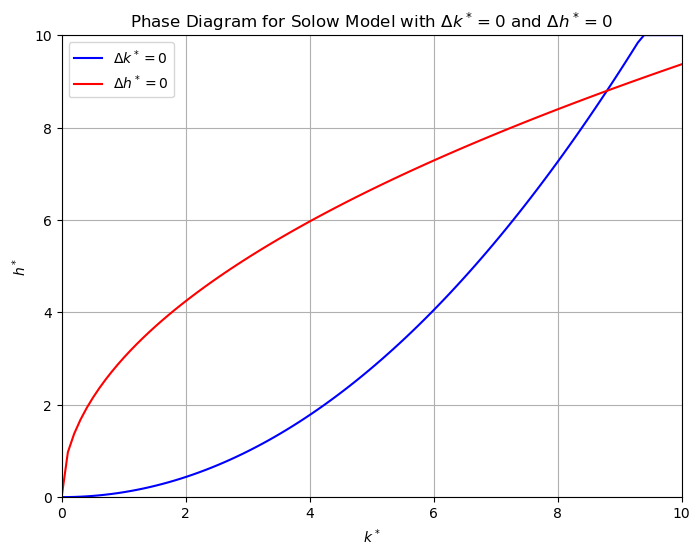

In [9]:
import numpy as np
import matplotlib.pyplot as plt


def h_steady_state_delta_k_zero(k, s_K, n, g, delta, alpha, phi):
    return np.minimum(((n + g + delta + n*g) / s_K)**(1 / phi) * k**((1 - alpha) / phi), 10)

def h_steady_state_delta_h_zero(k, s_H, n, g, delta, alpha, phi):
    return np.minimum((s_H / (n + g + delta + n*g))**(1 / (1 - phi)) * k**(alpha / (1 - phi)), 10)

# Range of k* values (include 0 for starting point)
k_values = np.linspace(0, 10, 100)  


s_K = 0.2
s_H = 0.2
alpha = 0.33
phi = 0.33
n = 0.025
g = 0.02
delta = 0.05

h_delta_k_zero = h_steady_state_delta_k_zero(k_values, s_K, n, g, delta, alpha, phi)
h_delta_h_zero = h_steady_state_delta_h_zero(k_values, s_H, n, g, delta, alpha, phi)

# Plot the phase diagram
plt.figure(figsize=(8, 6))
plt.plot(k_values, h_delta_k_zero, label=r'$\Delta k^* = 0$', color='blue')
plt.plot(k_values, h_delta_h_zero, label=r'$\Delta h^* = 0$', color='red')
plt.xlabel(r'$k^*$')
plt.ylabel(r'$h^*$')
plt.ylim(0, 10)  
plt.xlim(0, 10)  
plt.title('Phase Diagram for Solow Model with $\Delta k^* = 0$ and $\Delta h^* = 0$')
plt.legend()
plt.grid(True)
plt.show()



# Further analysis

**Changes of parameter values - sensitivity analysis**

Then to make a further analysis we take a look at what happends when we have different estimates for s_K. Which is interesting because k and h then will evolve differnent over time. We use it as a sensitivity analysis by changing the parameter values little by little. 

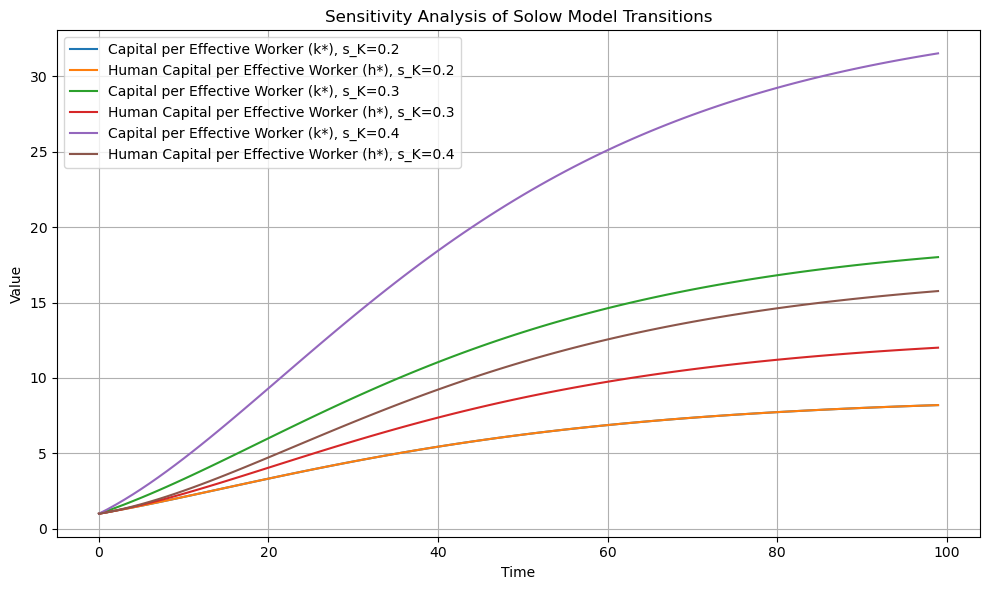

In [10]:
import numpy as np
import matplotlib.pyplot as plt

# Define the Solow model transition equations
def solow_model_dynamics(k, h, s_K, s_H, alpha, phi, n, g, delta):
    k_next = (1 / ((1 + n) * (1 + g))) * (s_K * k**alpha * h**phi + (1 - delta) * k)
    h_next = (1 / ((1 + n) * (1 + g))) * (s_H * k**alpha * h**phi + (1 - delta) * h)
    return k_next, h_next


def simulate_solow_model(k0, h0, s_K, s_H, alpha, phi, n, g, delta, T):
    k_values = np.zeros(T)
    h_values = np.zeros(T)
    k_values[0] = k0
    h_values[0] = h0
    
    for t in range(1, T):
        k_next, h_next = solow_model_dynamics(k_values[t-1], h_values[t-1], s_K, s_H, alpha, phi, n, g, delta)
        k_values[t] = k_next
        h_values[t] = h_next
    
    return k_values, h_values


def plot_transitions_over_time(parameter_values, parameter_name, k0, h0, s_K, s_H, alpha, phi, n, g, delta, T):
    fig, ax = plt.subplots(figsize=(10, 6))
    
    for param_value in parameter_values:
        if parameter_name == 's_K':
            s_K = param_value
        elif parameter_name == 's_H':
            s_H = param_value
        elif parameter_name == 'alpha':
            alpha = param_value
        elif parameter_name == 'phi':
            phi = param_value
        elif parameter_name == 'n':
            n = param_value
        elif parameter_name == 'g':
            g = param_value
        elif parameter_name == 'delta':
            delta = param_value
        
        k_values, h_values = simulate_solow_model(k0, h0, s_K, s_H, alpha, phi, n, g, delta, T)
        
        ax.plot(k_values, label=f'Capital per Effective Worker (k*), {parameter_name}={param_value}')
        ax.plot(h_values, label=f'Human Capital per Effective Worker (h*), {parameter_name}={param_value}')

    ax.set_title(f'Sensitivity Analysis of Solow Model Transitions')
    ax.set_xlabel('Time')
    ax.set_ylabel('Value')
    ax.legend()
    ax.grid(True)
    
    plt.tight_layout()
    plt.show()

# Define parameter values for sensitivity analysis
parameter_values = [0.2, 0.3, 0.4] 
parameter_name = 's_K'  # Parameter to vary (e.g., 's_K', 's_H', 'alpha', 'phi', 'n', 'g', 'delta')
k0 = 1.0  # Initial capital per effective worker
h0 = 1.0  # Initial human capital per effective worker
T = 100  # Number of time steps

# Performing sensitivity analysis and plot transitions over time
plot_transitions_over_time(parameter_values, parameter_name, k0, h0, 0.2, 0.2, 0.33, 0.33, 0.025, 0.02, 0.05, T)


Then we see that the effect is much larger on the k* variable when s_K is bigger. Although we see that h* also increases when s_K increases, but not as much as k*. The k* is directly changed by the higher savings rate, but h* is only indirectly affected and therefore we see the increasing distance between the two values.

**Shock to the economy**

Then we make a interactive diagram, where we can simulate shocks to the economy by making a change in the savings rate for s_K or s_K. The phasediagram shows how the steady state will change with different savings values and how the phasediagram equations move.

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, FloatSlider

# Define modified functions for unbounded growth
def h_steady_state_delta_k_zero(k, s_K, n, g, delta, alpha, phi):
    return ((n + g + delta + n*g) / s_K)**(1 / phi) * k**((1 - alpha) / phi)

def h_steady_state_delta_h_zero(k, s_H, n, g, delta, alpha, phi):
    return (s_H / (n + g + delta + n*g))**(1 / (1 - phi)) * k**(alpha / (1 - phi))


def plot_phase_diagram(s_K, s_H):
    k_values = np.linspace(0, 100, 500)  

    alpha = 0.33
    phi = 0.33
    n = 0.025
    g = 0.02
    delta = 0.05

    h_delta_k_zero = h_steady_state_delta_k_zero(k_values, s_K, n, g, delta, alpha, phi)
    h_delta_h_zero = h_steady_state_delta_h_zero(k_values, s_H, n, g, delta, alpha, phi)

    plt.figure(figsize=(10, 8))
    plt.plot(k_values, h_delta_k_zero, label=r'$\Delta k^* = 0$', color='blue')
    plt.plot(k_values, h_delta_h_zero, label=r'$\Delta h^* = 0$', color='red')
    plt.xlabel(r'$k^*$')
    plt.ylabel(r'$h^*$')
    plt.ylim(0, 25)  
    plt.xlim(0, 25)  
    plt.title('Phase Diagram for Solow Model with $\Delta k^* = 0$ and $\Delta h^* = 0$')
    plt.legend()
    plt.grid(True)
    plt.show()


interact(plot_phase_diagram,
         s_K=FloatSlider(min=0.1, max=1.0, step=0.01, value=0.2, description='s_K'),
         s_H=FloatSlider(min=0.1, max=1.0, step=0.01, value=0.2, description='s_H'))


interactive(children=(FloatSlider(value=0.2, description='s_K', max=1.0, min=0.1, step=0.01), FloatSlider(valu…

<function __main__.plot_phase_diagram(s_K, s_H)>

# Extension - Humancapital with tax

Then we add tax to the savings rates and analyze how that will impact the steady state and transition diagram. 

In [12]:
import scipy.optimize as optimize


# Constants
s_K = 0.2
s_H = 0.2
alpha = 0.33
phi = 0.33
n = 0.025
g = 0.02
delta = 0.05
tau_K = 0.1  # Tax rate on capital income
tau_H = 0.1  # Tax rate on human capital income

# Defining adjusted savings rates considering taxes
effective_s_K = s_K * (1 - tau_K)
effective_s_H = s_H * (1 - tau_H)



k_tilde_t = ((effective_s_K**(1-phi) * effective_s_H**phi) / (n + g + delta + n*delta))**(1 / (1 - alpha - phi))
h_tilde_t = ((effective_s_K**alpha * effective_s_H**(1-alpha)) / (n + g + delta + n*delta))**(1 / (1 - alpha - phi))
y_tilde_t = h_tilde_t**phi * k_tilde_t**alpha

obj_k_tilde = lambda k: k - k_tilde_t
obj_h_tilde = lambda h: h-h_tilde_t
obj_y_tilde = lambda y: y-y_tilde_t
# Use root_scalar to find the root of the objective function
result_k = optimize.root_scalar(obj_k_tilde, bracket=[0.1, 100], method='brentq')
result_h = optimize.root_scalar(obj_h_tilde, bracket=[0.1, 100], method='brentq')
result_y = optimize.root_scalar(obj_y_tilde, bracket=[0.1, 100], method='brentq')
print('The steady state for k_tilde is', result_k.root)
print('The steady state for h_tilde is', result_h.root)
print('The steady state for y_tilde is', result_y.root)

The steady state for k_tilde is 6.304096375054219
The steady state for h_tilde is 6.304096375054219
The steady state for y_tilde is 3.370940422772047


We see that all the steady states decrease with more than 10% (the tax) because we have spillover effects and therefore will the steady values drop lower than in the model without tax. All the parameter estimates is the same.

**Transition diagram comparison**

Then we simulate over time in the transition diagram with and without tax and compare the two models. 

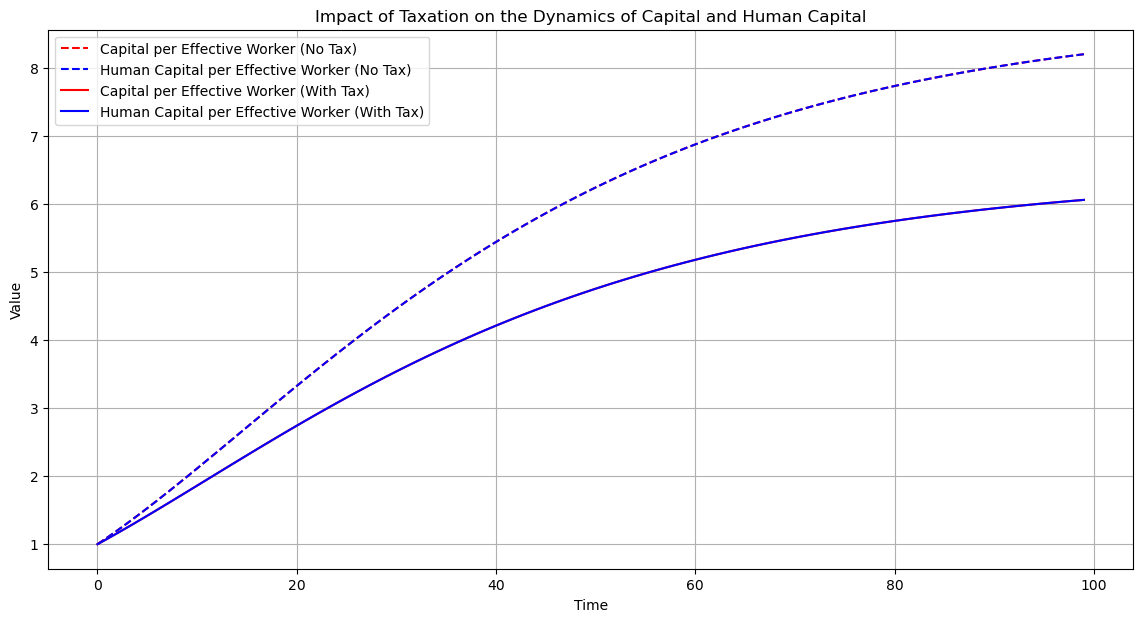

In [13]:
import numpy as np
import matplotlib.pyplot as plt

# Function to simulate Solow model dynamics over time
def solow_model_dynamics(k, h, s_K, s_H, alpha, phi, n, g, delta, tau_K=0, tau_H=0):
    effective_s_K = s_K * (1 - tau_K)  # Adjust saving rates for tax on capital
    effective_s_H = s_H * (1 - tau_H)  # Adjust saving rates for tax on human capital
    k_next = (1 / ((1 + n) * (1 + g))) * (effective_s_K * k**alpha * h**phi + (1 - delta) * k)
    h_next = (1 / ((1 + n) * (1 + g))) * (effective_s_H * k**alpha * h**phi + (1 - delta) * h)
    return k_next, h_next

# Simulation function
def simulate_solow_model(k0, h0, s_K, s_H, alpha, phi, n, g, delta, T, tau_K=0, tau_H=0):
    k_values = np.zeros(T)
    h_values = np.zeros(T)
    k_values[0] = k0
    h_values[0] = h0
    
    for t in range(1, T):
        k_values[t], h_values[t] = solow_model_dynamics(k_values[t-1], h_values[t-1], s_K, s_H, alpha, phi, n, g, delta, tau_K, tau_H)
    
    return k_values, h_values

# Parameters
s_K = 0.2
s_H = 0.2
alpha = 0.33
phi = 0.33
n = 0.025
g = 0.02
delta = 0.05
T = 100
k0 = 1.0
h0 = 1.0

# Tax rates
tau_K = 0.1  # Tax rate on capital income
tau_H = 0.1  # Tax rate on human capital income

# Simulate without tax
k_values_no_tax, h_values_no_tax = simulate_solow_model(k0, h0, s_K, s_H, alpha, phi, n, g, delta, T)

# Simulate with tax
k_values_with_tax, h_values_with_tax = simulate_solow_model(k0, h0, s_K, s_H, alpha, phi, n, g, delta, T, tau_K, tau_H)

# Plotting
plt.figure(figsize=(14, 7))
plt.plot(k_values_no_tax, label='Capital per Effective Worker (No Tax)', color='red', linestyle='--')
plt.plot(h_values_no_tax, label='Human Capital per Effective Worker (No Tax)', color='blue', linestyle='--')
plt.plot(k_values_with_tax, label='Capital per Effective Worker (With Tax)', color='red')
plt.plot(h_values_with_tax, label='Human Capital per Effective Worker (With Tax)', color='blue')
plt.xlabel('Time')
plt.ylabel('Value')
plt.title('Impact of Taxation on the Dynamics of Capital and Human Capital')
plt.legend()
plt.grid(True)
plt.show()


We see that when Time is higher then the absolute value difference is getting bigger.

# Conclusion

In this paper we use a solow-model with human capital, which makes two different savings. Where we have savings for capital and for human capital. We see with the same savings values then the steady state values will remain the same, but if we get different savings rates, then steady state values will differ. Then we used a interactive diagram to see the impact of savings to the transition diagram.

Thereafter, we made an extension to the model by including tax, where the conclusion was that the steady state values would drop more than 10 percent (which was the tax value). We also saw that tax will make a bigger difference in the phase diagram when Time is higher.

In generel this was a study of the human capital solow model with different savings rate and an addition with the impact of adding taxes to the model.